In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [30]:
file = 'price'
area = 'DK2'
fileName = file + "_" + area

file_uppercase = 'Price'
file_lowercase = 'price'

#config
save_plots = True

data = pd.read_csv("../../../data/data_sanitized/"+fileName+".csv") 
data['date']= pd.to_datetime(data['date'],format='%Y-%m-%d')
str_week_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ylabel = file_uppercase+' [MWh]'
ylabelTWh = file_uppercase+' [TWh]'

title = {}
title['avg_consumption_each_year'] = 'Average '+file_lowercase+' for each hour for years 2016-2020 (' + area + ")"
title['total_consumption_2019'] = 'Total '+file_lowercase+' per day for 2019 (' + area + ")"
title['total_consumption_2016_2019'] = 'Total '+file_lowercase+' for years 2016-2019 (' + area + ")"
title['median_per_dayofweek'] = 'Median '+file_lowercase+' for years 2016-2020 (' + area + ")"
title['std_per_dayofweek'] = 'Standard deviation of '+file_lowercase+' for years 2016-2020 (' + area + ")"
title['sma_per_dayofyear'] = 'Simple Moving Average for 14 days window (' + area + ")"
global_title = 'Average '+file_lowercase+' for years 2016-2020 (' + area + ")"

data['dayofweek'] = data['date'].dt.dayofweek
data['year'] = data['date'].dt.year
data['dayofyear'] = data['date'].dt.dayofyear


data

,date,holiday,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,dayofweek,year,dayofyear
0,2016-01-01,1,122.29,119.68,117.44,116.18,115.43,117.52,114.61,114.68,...,142.59,139.38,133.78,131.99,129.31,124.98,121.25,4,2016,1
1,2016-01-02,0,122.88,118.56,112.14,98.41,94.68,96.55,101.40,106.32,...,130.72,129.60,126.47,123.56,118.11,118.03,114.23,5,2016,2
2,2016-01-03,1,119.30,118.41,117.59,116.32,117.06,118.11,111.77,115.87,...,142.58,140.72,138.10,134.90,132.21,127.06,117.44,6,2016,3
3,2016-01-04,0,119.08,117.96,116.09,116.17,118.78,125.05,134.37,145.79,...,212.49,153.25,147.51,142.13,138.03,132.14,127.06,0,2016,4
4,2016-01-05,0,131.92,129.31,128.64,129.23,131.77,133.71,140.28,153.04,...,258.39,180.42,155.42,148.41,144.68,139.75,134.08,1,2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,2020-05-08,1,172.98,152.53,149.55,149.92,155.44,168.72,201.11,224.54,...,167.68,201.19,275.59,310.59,229.17,218.87,185.81,4,2020,129
1590,2020-05-09,0,160.50,154.60,155.87,156.77,164.15,162.14,157.51,157.51,...,157.51,201.24,273.17,253.62,211.01,197.06,171.09,5,2020,130
1591,2020-05-10,1,154.43,144.80,142.49,136.45,122.57,119.36,111.90,95.19,...,53.64,90.27,108.25,109.89,111.83,109.66,75.35,6,2020,131
1592,2020-05-11,0,43.19,15.07,0.97,-0.07,0.15,27.90,141.45,169.05,...,103.62,136.75,164.12,165.91,178.82,163.01,149.28,0,2020,132


In [31]:
def savePlot(name):
    if(save_plots):
        fileName = '../plots/'+ name + '_' + area
        plt.savefig(fileName, bbox_inches='tight')

In [32]:
def draw_plot_hour(data_serie):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    # for column in columns:
    ax.plot(data_serie)
    # set title and legend
    ax.set_title('Plot')
    ax.legend()
    
def draw_plot_hour_for_year(data_frame, name='Plot', ylabel = 'y ax'):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    plt.rc('ytick', labelsize=22)
    # plot each column
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for index, row in data_frame.iterrows():
        ax.plot(data_frame.loc[index], label=data_frame.loc[index].name)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 20})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    plt.rcParams.update({'font.size': 24})
    
def draw_two_plots_hour_for_year(data_frame, name=['Plot','Plot'], ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(nrows=2)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for holiday, new_df in data_frame.groupby(level=0):
        for index, row in new_df.iterrows():
            ax[index[0]].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[index[0]].set_title(name[index[0]])
            # set title and legend
            ax[index[0]].legend(prop={'size': 15})
            ax[index[0]].set_xlabel('Hour')
            ax[index[0]].set_ylabel(ylabel)

def draw_7_plots_hour_for_year(data_frame, name='Plot', ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(4, 2,sharey=True)
    fig.delaxes(ax[3,1])
    fig.set_figheight(14)
    fig.set_figwidth(20)
    fig.subplots_adjust(hspace=0.4)
    plt.rcParams.update({'font.size': 24})
    plt.rc('ytick', labelsize=18)
    plt.rc('xtick', labelsize=13)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    fig.text(0.07,0.5, ylabel, ha="center", va="center", rotation=90)
    fig.text(0.5,0.09, 'Hour', ha="center", va="center")
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for workday, new_df in data_frame.groupby(level=0):
        plot_index = int(workday/2),int(workday%2)
        for index, row in new_df.iterrows():
            ax[plot_index].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[int(index[0]/2),int(index[0]%2)].set_title(name[index[0]])
            # set title and legend
            ax[plot_index].yaxis.set_tick_params(labelleft=True)
    plt.figlegend(list(set(data_frame.index.get_level_values('year')))[::-1],loc=(0.72,0.065),fontsize=22)
            
def draw_plot_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    plt.rc('xtick', labelsize=22)
    ax.legend(prop={'size': 18})
    plt.rcParams.update({'font.size': 24})
            
def draw_simple_barplot_for_years(data_frame, name='Plot', ylabel = ylabel):
    fig, ax = plt.subplots()
    min_val = min(data_frame.iloc[:,0])
    max_val = max(data_frame.iloc[:,0])
    margin = (max_val - min_val)*3/10
    plt.ylim([min_val - margin,max_val + margin])
    ax.bar(data_frame.index,data_frame.iloc[:,0])
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(name)
    ax.set_xticks(data_frame.index)
    
def draw_plot_single_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    plt.rcParams.update({'font.size': 26})
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    # plot each column
    ax.plot(data_frame, label=data_frame.index)
    # set title and legend
    ax.set_title(name)
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    ax.set_xticks(ax.get_xticks()[::14])
    plt.xticks(rotation=90)

In [16]:
data_avg_by_year = data
data_avg_by_year['year']= data_avg_by_year['date'].dt.year
data_avg_by_year = data_avg_by_year.drop(columns=['holiday','date','dayofyear','dayofweek'])
data_avg_by_year = data_avg_by_year.groupby('year').mean()
data_avg_by_year

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
year,,,,,,,,,,,,,,,,,,,,,
2016,178.488224,168.273962,162.890014,160.434672,164.967650,178.101585,200.833825,244.784672,267.924508,262.255219,...,227.910546,229.663087,241.533689,262.539781,258.277077,243.927268,227.050355,213.908716,204.003525,187.896284
2017,193.169096,182.759753,176.189767,174.714466,179.625123,193.957836,223.457452,265.295370,283.704438,278.995918,...,240.813726,243.992877,255.428712,280.924822,285.064877,277.100164,257.450849,242.007726,228.887425,205.138740
2018,284.271589,268.792274,260.835397,257.149507,258.997096,283.204548,329.815863,390.303342,417.651233,409.560027,...,350.066630,350.181260,360.117370,389.737890,404.006082,399.693123,373.147973,349.538493,328.083781,296.403589
2019,249.219233,237.310384,229.121014,227.189726,231.318027,248.815589,291.900932,335.244301,349.689918,337.786192,...,294.452315,296.272055,306.715068,333.242877,350.975973,356.971370,340.596027,316.493918,294.941699,265.646411
2020,122.776090,110.602105,104.743759,103.150902,106.802857,119.033759,155.605489,196.041729,207.839398,187.167218,...,129.666992,133.525113,151.684812,190.657143,217.853835,216.544662,193.882256,171.688797,153.091278,133.726541


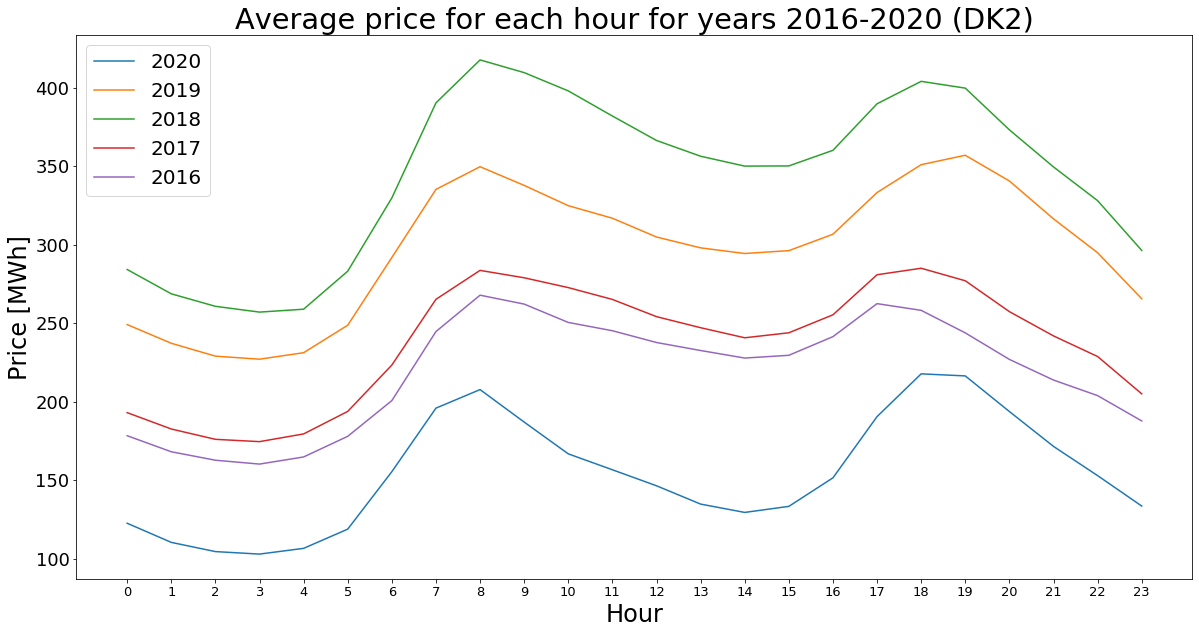

In [17]:
draw_plot_hour_for_year(data_avg_by_year, title['avg_consumption_each_year'], ylabel)
savePlot('avg_hour')

In [18]:
data_avg_by_year_per_holiday = data.copy()
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.drop(columns=['date','dayofyear','dayofweek'])
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.groupby(['holiday','year']).mean()
data_avg_by_year_per_holiday

0           1           2           3           4  \
holiday year                                                               
0       2016  181.356984  172.566721  167.110525  164.566262  169.978885   
        2017  197.499671  187.829507  181.341086  180.466316  186.261118   
        2018  288.749603  274.833907  266.757947  262.443974  264.727748   
        2019  252.599175  241.194026  235.118416  234.610429  240.815644   
        2020  123.651651  112.630826  106.296972  105.057431  109.491651   
1       2016  164.144426  146.810164  141.787459  139.776721  139.911475   
        2017  171.587213  157.494098  150.517623  146.049508  146.553934   
        2018  262.805556  239.830794  232.444762  231.769683  231.526349   
        2019  232.701129  218.330645  199.811129  190.924032  184.902258   
        2020  118.799583  101.388333   97.689583   94.492083   94.591250   

                       5           6           7           8           9  ...  \
holiday year                                                              ...   
0       2016  185.733639  212.275279  262.300787  287.305246  278.432066  ...   
        2017  202.567632  236.054243  283.068914  302.537434  293.989934  ...   
        2018  291.229636  343.645232  413.489901  442.011954  430.232219  ...   
        2019  259.695611  308.518185  356.851881  371.110132  354.660528  ...   
        2020  123.983578  168.490183  216.456789  228.783853  203.886972  ...   
1       2016  139.941311  143.626557  157.204098  171.020820  181.370984  ...   
        2017  151.050000  160.680000  176.719016  189.848197  204.271639  ...   
        2018  244.735079  263.522698  279.155079  300.874444  310.464762  ...   
        2019  195.643871  210.690806  229.645968  245.007258  255.319677  ...   
        2020   96.553333   97.087500  103.323333  112.716667  111.231667  ...   

                      14          15          16          17          18  \
holiday year                                                               
0       2016  238.692525  240.268918  253.253410  276.149967  269.299836   
        2017  251.233618  254.187336  265.389638  293.325132  294.481316   
        2018  362.290662  361.687914  371.583974  402.401589  415.595397   
        2019  306.536634  308.670165  317.761122  344.069010  361.075842   
        2020  143.000734  147.265688  165.438899  206.314771  233.222569   
1       2016  174.000656  176.633934  182.935082  194.488852  203.163279   
        2017  188.885082  193.187705  205.787377  219.126557  238.137049   
        2018  291.468889  295.022381  305.150476  329.032540  348.450952   
        2019  235.395081  235.681290  252.731935  280.334516  301.616935   
        2020   69.109583   71.120000   89.218333  119.545417  148.054167   

                      19          20          21          22          23  
holiday year                                                              
0       2016  251.835377  232.445541  217.963213  206.906689  191.640393  
        2017  283.711053  262.200066  245.507796  230.905493  206.478092  
        2018  409.678079  379.738775  354.968245  331.004636  298.464338  
        2019  365.831485  348.180825  322.306502  299.262574  269.235512  
        2020  227.504037  199.771009  175.578716  156.164587  136.820000  
1       2016  204.386721  200.074426  193.636230  189.487705  169.175738  
        2017  244.154098  233.782623  224.564754  218.830164  198.463934  
        2018  351.828730  341.553968  323.510159  314.082222  286.525079  
        2019  313.671129  303.528387  288.087258  273.825161  248.106129  
        2020  166.770833  167.137500  154.022083  139.133333  119.677083  

[10 rows x 24 columns]

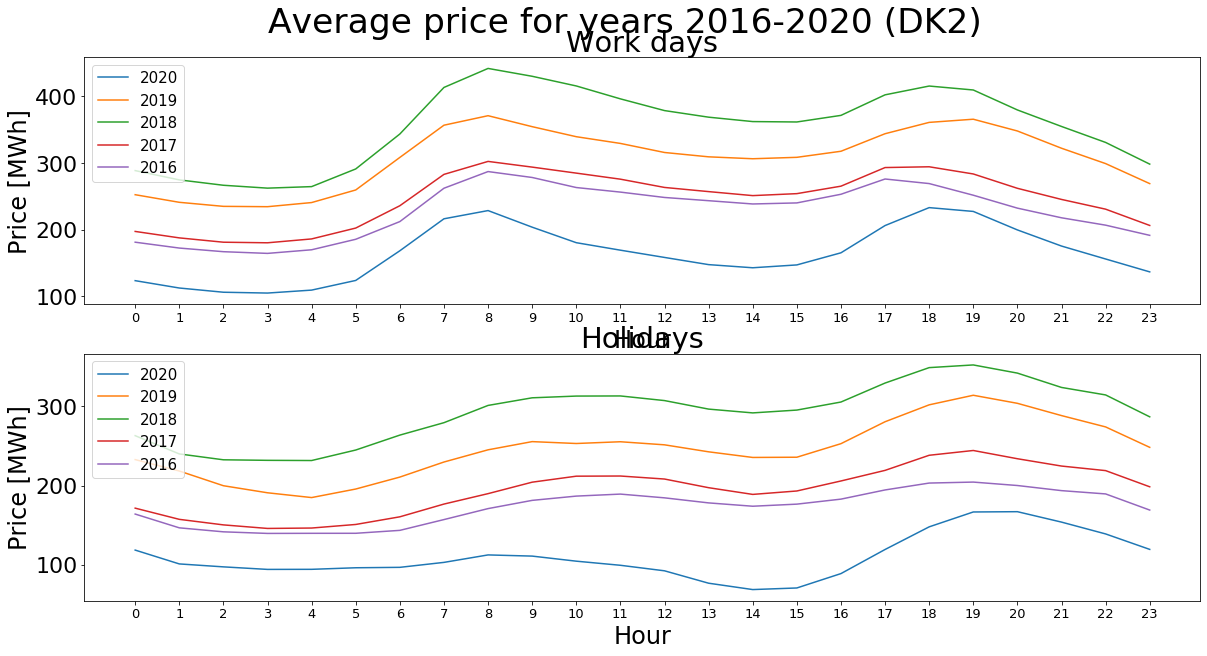

In [19]:
draw_two_plots_hour_for_year(data_avg_by_year_per_holiday, ['Work days','Holidays'], ylabel)
savePlot('avg_workday_holiday')

In [25]:
data_avg_by_year_per_dayofweek = data.copy()
df = data_avg_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_avg_by_year_per_dayofweek = df

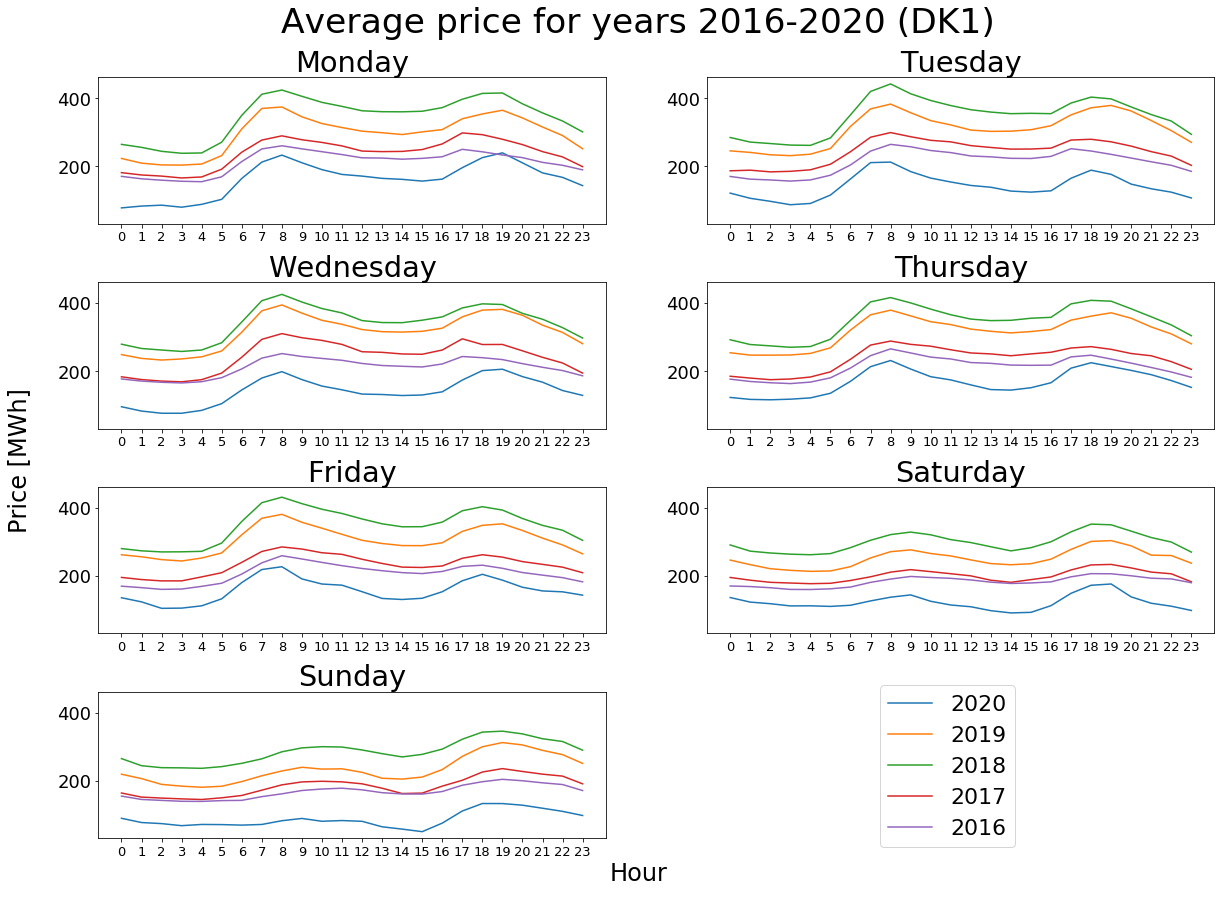

In [27]:
draw_7_plots_hour_for_year(data_avg_by_year_per_dayofweek, str_week_list, ylabel)
savePlot('avg_dayofweek')

In [11]:
data_std_by_year_per_dayofweek = data.copy()
df = data_std_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).std()
data_std_by_year_per_dayofweek = df
data_std_by_year_per_dayofweek

0           1           2           3           4  \
dayofweek year                                                               
0         2016   48.204056   50.929429   52.139817   52.527286   51.924672   
          2017   47.193800   51.533480   56.676766   55.576917   53.584460   
          2018   96.761896   97.038290  105.224269  107.888852  104.450794   
          2019   92.377365  103.104311  110.223866  107.891803  101.965815   
          2020   61.199214   66.879861   70.629717   69.770185   66.676616   
1         2016   66.084350   72.923396   83.843226   94.256127   90.611247   
          2017   47.877434   49.596191   52.241026   50.397687   47.899567   
          2018   93.417104   94.736729   96.286693   98.016234   93.274137   
          2019   72.490620   73.344762   81.562566   81.730633   80.783315   
          2020   51.529078   50.651130   56.022443   54.099049   56.532144   
2         2016   40.836354   45.235819   48.511796   49.321736   47.206324   
          2017   54.476454   60.187640   63.612037   63.189315   60.900305   
          2018   90.736975   97.967899  101.268910  105.860377  102.462908   
          2019   97.937147  109.927723  112.503234   99.240241   93.307799   
          2020   53.743126   57.280389   61.579077   60.312250   53.173622   
3         2016   40.005206   41.419020   42.165495   44.328385   43.253380   
          2017   67.034094   67.432584   63.342979   59.454805   50.527718   
          2018   79.600355   82.511736   85.291750   87.182883   87.475445   
          2019   64.529149   63.980295   61.269922   62.219606   63.995942   
          2020   71.785321   68.292793   69.428805   70.033152   67.459191   
4         2016   42.186273   40.643473   41.238497   39.140028   37.021785   
          2017   38.931359   41.798251   48.270673   44.306062   35.410732   
          2018   82.330462   85.464768   91.134474   92.882472   91.746724   
          2019   55.197339   55.448713   62.282547   64.243713   55.556355   
          2020   63.964908   62.296784   65.379220   64.491543   64.948454   
5         2016   41.727978   43.083178   46.380976   48.757380   48.828502   
          2017   49.541510   54.309472   59.886769   59.963477   62.188543   
          2018   88.412682   92.005827   94.520686   95.100505   97.330814   
          2019   83.110362   88.181805   92.934082   96.104431   95.126549   
          2020   70.169571   67.932342   62.883815   62.625118   61.545310   
6         2016   63.575446   78.729004   79.481430   71.900994   66.135150   
          2017   94.895340   97.847473  102.218521   96.333805   92.243281   
          2018  106.481870  119.740941  119.823795  115.766391  114.495338   
          2019   93.349328   91.852215   98.061858   97.302402   95.920640   
          2020   64.476385   66.020986   66.256531   65.563547   61.145456   

                         5          6           7           8           9  \
dayofweek year                                                              
0         2016   45.811963  58.906171   78.302109  100.979393  106.648607   
          2017   36.971690  44.777513   85.084255   92.281857   88.891356   
          2018   90.293431  86.318926  106.152682  139.457544  142.817393   
          2019   86.259952  54.824319   74.124247   78.342602   74.844096   
          2020   70.200648  75.147183   92.315630  107.399978   99.996348   
1         2016   71.800649  73.915149  128.529926  152.474762  148.385512   
          2017   36.121165  38.354825   69.595905   82.917086   78.325183   
          2018   86.634090  96.787350  153.952895  175.152309  162.870254   
          2019   72.517241  56.636683   64.090896   72.440807   70.375892   
          2020   56.649900  58.199037   57.786953   65.561074   80.376938   
2         2016   45.273049  56.083279   74.373762   87.105104   88.200240   
          2017   48.464071  51.555780  103.140530  121.492807  108.471560   
          2018   95.402593  81.067418  108.180724  125.00303

In [13]:
draw_7_plots_hour_for_year(data_std_by_year_per_dayofweek, str_week_list, ylabel, title['std_per_dayofweek'])
savePlot('std_dayofweek')

NameError: name 'data_std_by_year_per_dayofweek' is not defined

In [13]:
data_median_by_year_per_dayofweek = data.copy()
df = data_median_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_median_by_year_per_dayofweek = df
data_median_by_year_per_dayofweek

0           1           2           3           4  \
dayofweek year                                                               
0         2016  174.096939  166.462245  161.613061  160.090408  167.503878   
          2017  190.965714  183.421837  175.771633  172.691633  178.259184   
          2018  276.116735  265.740612  251.473061  241.794082  245.502653   
          2019  234.891765  213.840000  207.279216  207.572353  215.237255   
          2020   87.350556   90.408333   92.384444   91.180556   92.606667   
1         2016  175.924615  168.072692  161.438077  158.538654  164.905769   
          2017  199.614902  192.380588  187.657255  187.823725  192.569216   
          2018  288.523600  274.541000  266.774000  262.423200  264.464800   
          2019  249.688824  245.802549  239.677647  238.342745  243.342157   
          2020  131.101053  114.452105  107.392632  103.815789  110.775263   
2         2016  183.994423  175.530962  170.545192  167.694615  173.345577   
          2017  192.694615  178.859231  172.866346  171.570577  180.020192   
          2018  284.083137  269.520784  263.649608  260.413137  265.821961   
          2019  251.657200  240.116000  234.974600  238.864400  246.800000   
          2020  107.496111   90.729444   84.736111   86.081111   93.917778   
3         2016  183.264600  173.719200  169.785400  166.928000  172.625400   
          2017  191.474200  183.425400  178.320800  178.016400  186.410000   
          2018  296.901400  281.782400  276.347800  271.673200  274.041600   
          2019  259.210408  251.040612  250.175306  252.383673  258.744490   
          2020  130.417778  122.170000  120.811111  122.503333  125.632778   
4         2016  183.075600  175.536000  169.605400  169.521000  177.902200   
          2017  204.856000  196.367600  188.741600  189.856000  199.181400   
          2018  290.656400  279.708400  272.621000  272.525600  275.007600   
          2019  269.414800  260.423600  252.081000  250.626800  261.876800   
          2020  143.725294  130.779412  112.105294  113.168824  119.669412   
5         2016  187.506346  175.885577  169.557692  164.648077  163.854231   
          2017  205.107500  192.514615  184.657500  182.799423  181.289038   
          2018  295.775962  277.526923  269.335577  265.346154  263.183269   
          2019  251.327500  236.770192  227.590577  221.229423  220.524423   
          2020  141.527368  127.335789  119.860526  113.637895  114.560526   
6         2016  171.646154  156.878462  152.218173  149.570577  148.823846   
          2017  175.308679  161.902830  154.328585  151.096415  150.228113   
          2018  273.697885  251.233654  243.765962  241.310385  240.632885   
          2019  230.969038  216.110769  198.341731  191.752885  189.644615   
          2020  107.912105   89.325789   85.513684   80.995789   84.858421   

                         5           6           7           8           9  \
dayofweek year                                                               
0         2016  189.005306  223.322653  268.435510  294.029388  283.495306   
          2017  205.412041  248.598367  295.653265  311.772653  299.496122   
          2018  286.264286  347.355510  428.834082  454.381837  438.768980   
          2019  251.713922  318.500980  376.132353  380.263137  359.217843   
          2020  112.790556  177.350556  229.175000  257.232222  227.673889   
1         2016  182.559615  214.799808  276.265192  309.458269  301.094423   
          2017  210.231176  251.638235  309.359216  330.237647  318.042549   
          2018  294.188600  353.165400  447.721800  477.923200  452.524800   
          2019  263.268431  324.488627  376.745490  392.604314  370.560588   
          2020  126.941053  171.326842  228.549474  229.527895  207.295263   
2         2016  189.624808  218.742308  259.537308  282.838654  269.601538   
          2017  200.003077  246.691154  308.301731  336.232885  318.310192   
          2018  291.129216  356.166863  430.95

In [75]:
draw_7_plots_hour_for_year(data_median_by_year_per_dayofweek, str_week_list, ylabel, title['median_per_dayofweek'])
savePlot('median_dayofweek')

NameError: name 'data_median_by_year_per_dayofweek' is not defined

In [33]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).mean()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear            
2016 1          124.002917
     2          120.255625
     3          122.346250
     4          127.317188
     5          133.463167
...                    ...
2020 129        145.608065
     130        148.913631
     131        145.966369
     132        140.044583
     133        138.033839

[1594 rows x 1 columns]

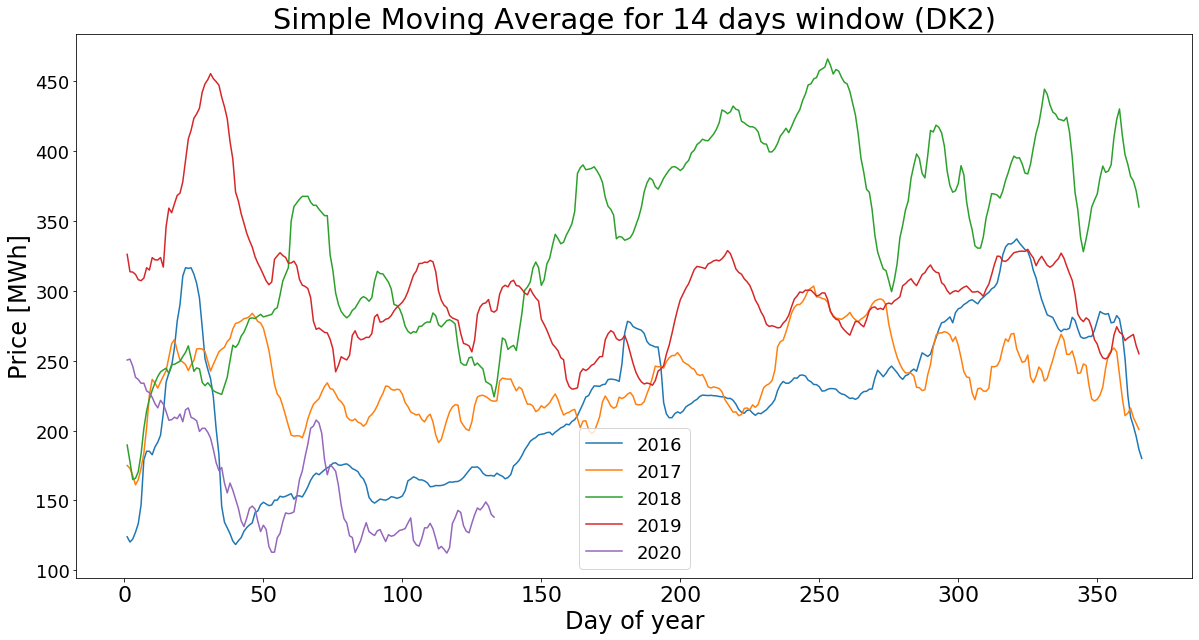

In [35]:
draw_plot_dayofyear(data_total_per_day_of_year, title['sma_per_dayofyear'],ylabel)
savePlot('sma_14days')

In [17]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).mean()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear            
2016 1          124.002917
     2          120.255625
     3          122.346250
     4          127.317188
     5          133.463167
...                    ...
2020 129        145.608065
     130        148.913631
     131        145.966369
     132        140.044583
     133        138.033839

[1594 rows x 1 columns]

In [18]:
# data_per_year = data.copy()
# df = data_per_year
# df = df.drop(columns=['holiday','date','dayofweek','dayofyear'])
# df = df.set_index(['year']).stack().reset_index().rename(columns={"level_1": "hour"})
# df = df.groupby(['year']).sum()
# df.iloc[:,0] = df.iloc[:,0] / 1000000
# df = df.iloc[:-1,:]
# data_per_year = df
# data_per_year

In [19]:
# draw_simple_barplot_for_years(data_per_year,title['total_consumption_2016_2019'], ylabel = ylabelTWh)
# savePlot('total_year')

In [20]:
# data_one_year = data.copy()
# df = data_one_year
# df['day'] = df['date'].dt.strftime('%m-%d')
# df = df[df.year == 2019]
# # df = df.set_index(['day'])
# df = df.drop(columns=['date','year','holiday','dayofweek','dayofyear'])
# # df.pivot(index=df.index,columns=['year','dayofyear'])
# # df = df.melt('Date', var_name='X', value_name='Val')
# df = df.set_index(['day']).stack().reset_index()
# df = df.groupby(['day']).sum()
# data_one_year = df

In [21]:
# draw_plot_single_dayofyear(data_one_year, title['total_consumption_2019'])
# savePlot('total_day_2019')